In [10]:
import numpy as np
import pandas as pd
import math

# Define the dataset
data = {
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the entropy of the target variable
def entropy(data):
    total_samples = len(data)
    if total_samples == 0:
        return 0

    unique_labels = data['buys_computer'].unique()
    entropy_value = 0

    for label in unique_labels:
        label_count = len(data[data['buys_computer'] == label])
        probability = label_count / total_samples
        entropy_value -= probability * math.log2(probability)

    return entropy_value

entropy_root = entropy(df)

# Calculate the conditional entropy and information gain for each feature
features = ['age', 'income', 'student', 'credit_rating']
information_gains = {}

for feature in features:
    weighted_entropy = 0

    for value in df[feature].unique():
        subset = df[df[feature] == value]
        subset_entropy = entropy(subset)
        weight = len(subset) / len(df)
        weighted_entropy += weight * subset_entropy

    information_gain = entropy_root - weighted_entropy
    information_gains[feature] = information_gain

# Select the feature with the highest information gain as the root node
root_node = max(information_gains, key=information_gains.get)

print("Information Gains:")
for feature, gain in information_gains.items():
    print(f"{feature}: {gain}")

print(f"\nThe root node for the decision tree is '{root_node}' with an information gain of {information_gains[root_node]}")


Information Gains:
age: 0.24674981977443933
income: 0.02922256565895487
student: 0.15183550136234159
credit_rating: 0.04812703040826949

The root node for the decision tree is 'age' with an information gain of 0.24674981977443933


In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Convert categorical data to numerical using label encoding
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Split the data into features (X) and the target variable (y)
X = df.drop('buys_computer', axis=1)
y = df['buys_computer']

# Create and fit the DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X, y)



# Get the depth of the constructed tree
tree_depth = model.get_depth()
print(f"Tree Depth: {tree_depth}")


Tree Depth: 4


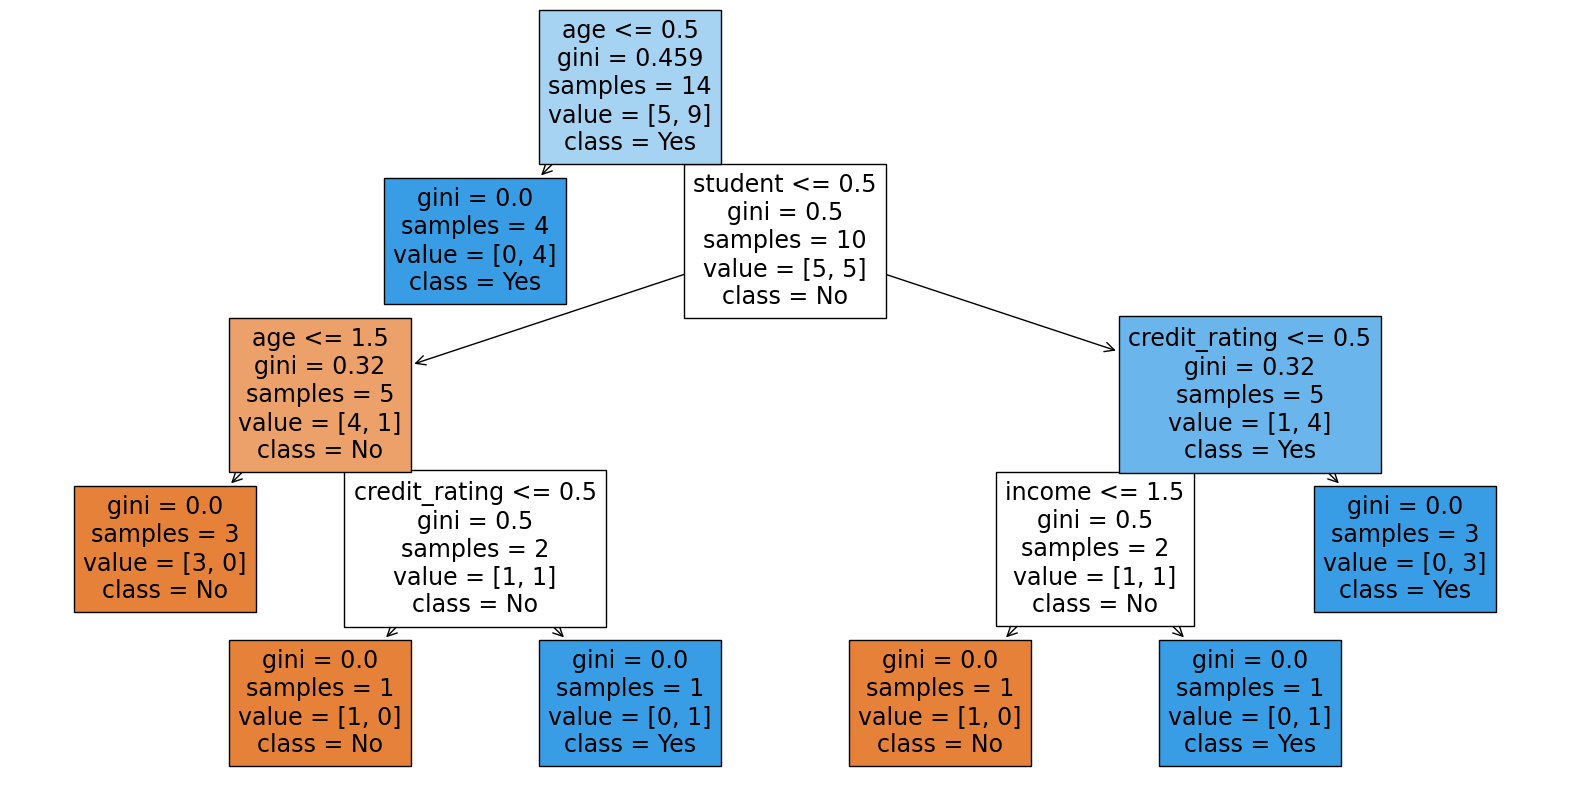

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create a larger figure for better visualization
plt.figure(figsize=(20, 10))

# Plot the Decision Tree
plot_tree(model, filled=True, feature_names=df.columns[:-1], class_names=['No', 'Yes'])

# Display the plot
plt.show()

# saving the plot in .jpg format
plt.savefig("tree1.jpg")


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Load the dataset (replace 'hdddata.csv' with the actual file path)
data = pd.read_csv('hdddata.csv')

# Specify the name of your target column
target_column = 'actual_target_column_name'

# Split the data into features (X) and the target variable (y)
X = data.drop(target_column, axis=1)
y = data[target_column]

# Split the data into training and test sets (e.g., 70% training, 30% test)
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)

# Calculate the training set accuracy
training_accuracy = model.score(Tr_X, Tr_y)

# Calculate the test set accuracy
test_accuracy = model.score(Te_X, Te_y)

print(f"Training Set Accuracy: {training_accuracy}")
print(f"Test Set Accuracy: {test_accuracy}")

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str))
plt.show()
